In [94]:
import pandas as pd
df = pd.read_csv('/home/sa.goyal/Downloads/weather_report_2.csv')
df

,day,city,temp,windspeed,event
0,01/01/17,NY,32,6,Rain
1,01/02/17,NY,36,7,Sunny
2,01/03/17,NY,28,12,Sunny
3,01/04/17,NY,33,7,Sunny
4,01/05/17,Mumbai,90,5,Sunny
5,01/06/17,Mumbai,85,12,Fog
6,01/01/17,Paris,87,15,Fog
7,01/03/17,Paris,56,5,Cloudy
8,01/05/17,Paris,78,5,Cloudy
9,01/07/17,Paris,76,20,Cloudy


In [73]:
ll

,0
0,01/07/17
1,Paris
2,33
3,33
4,ON DEMAND


In [101]:
gb = df.groupby(['city','windspeed'])
# SELECT * FROM city_data GROUP BY city

for city, city_df in gb:
    if city[1] == 20 and 'Sunny' not in list(city_df['event']):
        #ll = pd.DataFrame(['01/07/17',city,33,33,'ON DEMAND'])
        dd = pd.DataFrame({
            'day': ['01/07/17'],
            'city': [city[0]],
            'temp': [33],
            'windspeed':[33],
            'event':['ON DEAMND']
        }, columns = ['day','city','temp','windspeed','event'])
        dff = pd.concat([df,dd], ignore_index=True)
dff.values.tolist()

[['01/01/17', 'NY', 32, 6, 'Rain'],
 ['01/02/17', 'NY', 36, 7, 'Sunny'],
 ['01/03/17', 'NY', 28, 12, 'Sunny'],
 ['01/04/17', 'NY', 33, 7, 'Sunny'],
 ['01/05/17', 'Mumbai', 90, 5, 'Sunny'],
 ['01/06/17', 'Mumbai', 85, 12, 'Fog'],
 ['01/01/17', 'Paris', 87, 15, 'Fog'],
 ['01/03/17', 'Paris', 56, 5, 'Cloudy'],
 ['01/05/17', 'Paris', 78, 5, 'Cloudy'],
 ['01/07/17', 'Paris', 76, 20, 'Cloudy'],
 ['01/07/17', 'Paris', 33, 33, 'ON DEAMND']]

In [3]:
gb.get_group('Mumbai')

,day,city,temp,windspeed,event
4,01/05/17,Mumbai,90,5,Sunny
5,01/06/17,Mumbai,85,12,Fog


In [4]:
### SPILT, APPLY, COMBINE

gb.max() # all the maximum enteries are shown 

,day,temp,windspeed,event
city,,,,
Mumbai,01/06/17,90,12,Sunny
NY,01/04/17,36,12,Sunny
Paris,01/07/17,87,20,Fog


In [5]:
gb.mean()

,temp,windspeed
city,,
Mumbai,87.50,8.50
NY,32.25,8.00
Paris,74.25,11.25


In [8]:
dd = gb.describe()
dd

temp                                                   windspeed  \
       count   mean        std   min    25%   50%    75%   max     count   
city                                                                       
Mumbai   2.0  87.50   3.535534  85.0  86.25  87.5  88.75  90.0       2.0   
NY       4.0  32.25   3.304038  28.0  31.00  32.5  33.75  36.0       4.0   
Paris    4.0  74.25  13.073510  56.0  71.00  77.0  80.25  87.0       4.0   

                                                       
         mean       std  min   25%   50%    75%   max  
city                                                   
Mumbai   8.50  4.949747  5.0  6.75   8.5  10.25  12.0  
NY       8.00  2.708013  6.0  6.75   7.0   8.25  12.0  
Paris   11.25  7.500000  5.0  5.00  10.0  16.25  20.0

In [9]:
dd[]

MultiIndex(levels=[[u'temp', u'windspeed'], [u'count', u'mean', u'std', u'min', u'25%', u'50%', u'75%', u'max']],
           labels=[[0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1], [0, 1, 2, 3, 4, 5, 6, 7, 0, 1, 2, 3, 4, 5, 6, 7]])

city
Mumbai    AxesSubplot(0.125,0.125;0.775x0.755)
NY        AxesSubplot(0.125,0.125;0.775x0.755)
Paris     AxesSubplot(0.125,0.125;0.775x0.755)
dtype: object

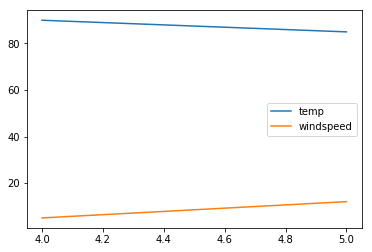

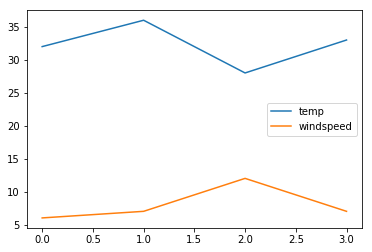

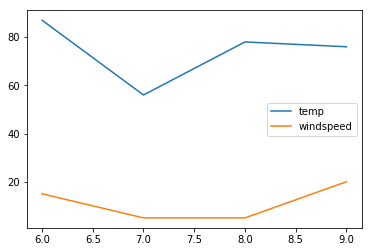

In [7]:
%matplotlib inline
gb.plot()

In [8]:
india_weather = pd.DataFrame({
    'city': ['Mumbai','Delhi','Chandigarh'],
    'temp': [30,40,20],
    'fog': [20,10,5]
})
india_weather

,city,fog,temp
0,Mumbai,20,30
1,Delhi,10,40
2,Chandigarh,5,20


In [9]:
us_weather = pd.DataFrame({
    'city': ['NY','Chicago','Orlando'],
    'temp': [5,14,9],
    'fog': [30,10,15]
})
us_weather

,city,fog,temp
0,NY,30,5
1,Chicago,10,14
2,Orlando,15,9


In [16]:
df_temp_fog = pd.concat([india_weather, us_weather], ignore_index=True)
df_temp_fog

,city,fog,temp
0,Mumbai,20,30
1,Delhi,10,40
2,Chandigarh,5,20
3,NY,30,5
4,Chicago,10,14
5,Orlando,15,9


In [15]:
df_t_f = pd.concat([india_weather, us_weather], keys=['India','US'])
df_t_f

city  fog  temp
India 0      Mumbai   20    30
      1       Delhi   10    40
      2  Chandigarh    5    20
US    0          NY   30     5
      1     Chicago   10    14
      2     Orlando   15     9

In [17]:
df_t_f.loc['India']     # subset of dataframe

,city,fog,temp
0,Mumbai,20,30
1,Delhi,10,40
2,Chandigarh,5,20


In [18]:
temp_df = pd.DataFrame({
    'city': ['Mumbai','Delhi','Chandigarh'],
    'temp': [30,40,20]
}, index=[0,1,2])

# or 
# temp_df.set_index('city', inplace=True)
temp_df

,city,temp
0,Mumbai,30
1,Delhi,40
2,Chandigarh,20


In [19]:
fog_df = pd.DataFrame({
    'city': ['Delhi','Mumbai','Chandigarh'],
    'fog': [20,30,10],
}, index=[1,0,2])

# or
# fog_df.set_index('city', inplace=True)
fog_df

,city,fog
1,Delhi,20
0,Mumbai,30
2,Chandigarh,10


In [20]:
#### JOINS

new_df = pd.concat([temp_df, fog_df], axis=1)
new_df

,city,temp,city,fog
0,Mumbai,30,Mumbai,30
1,Delhi,40,Delhi,20
2,Chandigarh,20,Chandigarh,10


In [23]:
ev = pd.Series(['Humid','Dry','Rain'], name='event')
ev

0    Humid
1      Dry
2     Rain
Name: event, dtype: object

In [27]:
new_df_2 = pd.concat([temp_df, ev], axis=1)
new_df_2

,city,temp,event
0,Mumbai,30,Humid
1,Delhi,40,Dry
2,Chandigarh,20,Rain


In [70]:
df1 = pd.DataFrame({
    'city': ['Mumbai','Gurgaun','Chandigarh'],
    'temp': [30,40,20]
})
df1

,city,temp
0,Mumbai,30
1,Gurgaun,40
2,Chandigarh,20


In [71]:
df2 = pd.DataFrame({
    'city': ['Mumbai','Delhi','Chandigarh','Kolkata'],
    'temp': [30,40,20,98]
})
df2

,city,temp
0,Mumbai,30
1,Delhi,40
2,Chandigarh,20
3,Kolkata,98


In [72]:
#### Inner Join
# df_df = pd.merge(temp_df, fog_df, on='city')

#### Outer Join
df_df = pd.merge(df1, df2, on='city', how='outer', indicator=True, suffixes=('_left','_right'))
df_df

,city,temp_left,temp_right,_merge
0,Mumbai,30.0,30.0,both
1,Gurgaun,40.0,NaN,left_only
2,Chandigarh,20.0,20.0,both
3,Delhi,NaN,40.0,right_only
4,Kolkata,NaN,98.0,right_only


In [69]:
df

,day,city,temp,windspeed,event
0,01/01/17,NY,32,6,Rain
1,01/02/17,NY,36,7,Sunny
2,01/03/17,NY,28,12,Sunny
3,01/04/17,NY,33,7,Sunny
4,01/05/17,Mumbai,90,5,Sunny
5,01/06/17,Mumbai,85,12,Fog
6,01/01/17,Paris,87,15,Fog
7,01/03/17,Paris,56,5,Cloudy
8,01/05/17,Paris,78,5,Cloudy
9,01/07/17,Paris,76,20,Cloudy


In [257]:
# df.pivot(index='day', columns='city', values='temp')

df.pivot(index='day', columns='city')

temp             windspeed              event               
city     Mumbai    NY Paris    Mumbai    NY Paris Mumbai     NY   Paris
day                                                                    
01/01/17    NaN  32.0  87.0       NaN   6.0  15.0    NaN   Rain     Fog
01/02/17    NaN  36.0   NaN       NaN   7.0   NaN    NaN  Sunny     NaN
01/03/17    NaN  28.0  56.0       NaN  12.0   5.0    NaN  Sunny  Cloudy
01/04/17    NaN  33.0   NaN       NaN   7.0   NaN    NaN  Sunny     NaN
01/05/17   90.0   NaN  78.0       5.0   NaN   5.0  Sunny    NaN  Cloudy
01/06/17   85.0   NaN   NaN      12.0   NaN   NaN    Fog    NaN     NaN
01/07/17    NaN   NaN  76.0       NaN   NaN  20.0    NaN    NaN  Cloudy

In [262]:
#### by default gives the output of the average of the values having same index
# 01/01/17 -> temp=32
# 01/01/17 -> temp=35

# output -> temp = mean(32,35)              --operation     --All
df.pivot_table(index='day', columns='city', aggfunc='sum', margins=True)

temp                    windspeed                
city                Mumbai     NY  Paris  All    Mumbai    NY Paris All
day                                                                    
2017-01-01 00:00:00    NaN   32.0   87.0  119       NaN   6.0  15.0  21
2017-01-02 00:00:00    NaN   36.0    NaN   36       NaN   7.0   NaN   7
2017-01-03 00:00:00    NaN   28.0   56.0   84       NaN  12.0   5.0  17
2017-01-04 00:00:00    NaN   33.0    NaN   33       NaN   7.0   NaN   7
2017-01-05 00:00:00   90.0    NaN   78.0  168       5.0   NaN   5.0  10
2017-01-06 00:00:00   85.0    NaN    NaN   85      12.0   NaN   NaN  12
2017-01-07 00:00:00    NaN    NaN   76.0   76       NaN   NaN  20.0  20
All                  175.0  129.0  297.0  601      17.0  32.0  45.0  94

In [263]:
df.day = pd.to_datetime(df.day)
df

,day,city,temp,windspeed,event
0,2017-01-01,NY,32,6,Rain
1,2017-01-02,NY,36,7,Sunny
2,2017-01-03,NY,28,12,Sunny
3,2017-01-04,NY,33,7,Sunny
4,2017-01-05,Mumbai,90,5,Sunny
5,2017-01-06,Mumbai,85,12,Fog
6,2017-01-01,Paris,87,15,Fog
7,2017-01-03,Paris,56,5,Cloudy
8,2017-01-05,Paris,78,5,Cloudy
9,2017-01-07,Paris,76,20,Cloudy


In [265]:
#### groups the index via month -> 'M', gives the avg of whole month

df.pivot_table(index=pd.Grouper(freq='M',key='day'),columns='city')

temp               windspeed            
city       Mumbai     NY  Paris    Mumbai   NY  Paris
day                                                  
2017-01-31   87.5  32.25  74.25       8.5  8.0  11.25

In [74]:
df2 = pd.DataFrame({
    'day': ['Mon','Tues','Wed','Thrus','Fri','Sat','Sun'],
    'chicago': [40,50,60,79,47,57,66],
    'NY': [24,23,56,65,44,45,56],
    'Orlando': [32,34,12,44,45,66,57]
})
df2

,NY,Orlando,chicago,day
0,24,32,40,Mon
1,23,34,50,Tues
2,56,12,60,Wed
3,65,44,79,Thrus
4,44,45,47,Fri
5,45,66,57,Sat
6,56,57,66,Sun


In [75]:
df2_new = pd.melt(df2, id_vars=['day'], var_name='city', value_name='temp')
df2_new
#df2_new[df2_new['city']=='chicago']

,day,city,temp
0,Mon,NY,24
1,Tues,NY,23
2,Wed,NY,56
3,Thrus,NY,65
4,Fri,NY,44
5,Sat,NY,45
6,Sun,NY,56
7,Mon,Orlando,32
8,Tues,Orlando,34
9,Wed,Orlando,12


In [19]:
import pandas as pd
df = pd.read_excel("/home/sa.goyal/Downloads/weather_report_3.xlsx", header=[0,1])
df

price                     P/E                 
company       fb google microsoft     fb google microsoft
2017-06-05   155    955        66  37.10   32.0     30.31
2017-06-06   657    987        69  36.98   32.3     30.56
2017-06-07   354    654        62  36.78   31.0     30.46
2017-06-08   353    456        61  36.11   31.0     30.11
2017-06-09   543    432        66  37.07   30.0     31.00

In [25]:
df['price']['map'] = pd.Series(['vc','vr','v','ve2'])

/home/sa.goyal/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [115]:
fmi = pd.DataFrame([list('abcd'),list('efgh'), list('ijkl'), list('mnop')], columns=pd.MultiIndex.from_product([['one','two'], ['first','second']]))

fmi

one          two       
  first second first second
0     a      b     c      d
1     e      f     g      h
2     i      j     k      l
3     m      n     o      p

In [154]:
l = ['1','2','3','4']
rr

array([['a', 'b', 'a', 'c', 'd'],
       ['e', 'f', 'a', 'g', 'h'],
       ['i', 'j', 'a', 'k', 'l'],
       ['m', 'n', 'a', 'o', 'p']], dtype=object)

In [165]:
import numpy as np
fmi['one','three'] = ['a','a','a','a']
df = fmi.sort_index(axis=1)
rr = df.values
np.insert(rr, 0, l, axis=1)
for i in rr:
    for j in range(len(i)):
        if j==0:
            print i[j]
            

a
e
i
m


In [173]:
ss = 'a/b/c/key'
ss.rsplit('/',1)

['a/b/c', 'key']

In [126]:
df2 = df.reindex_axis(ll, axis=1, level=1)
df2

/home/sa.goyal/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:1: FutureWarning: '.reindex_axis' is deprecated and will be removed in a future version. Use '.reindex' instead.
  """Entry point for launching an IPython kernel.


one          two      
  second first second first
0      b     a      d     c
1      f     e      h     g
2      j     i      l     k
3      n     m      p     o

In [111]:
#### df_stacked = df.stack(level=0)  -> transposes the level 0 columns ans so on

df_stacked = df.stack()  # transposes the innermost columns 
df_stacked

one  two
0 first    a    c
  second   b    d
  three    a  NaN
1 first    e    g
  second   f    h
  three    a  NaN
2 first    i    k
  second   j    l
  three    a  NaN
3 first    m    o
  second   n    p
  three    a  NaN

In [112]:
dd = df_stacked.unstack()
dd

one                two             
  first second three first second three
0     a      b     a     c      d   NaN
1     e      f     a     g      h   NaN
2     i      j     a     k      l   NaN
3     m      n     a     o      p   NaN

In [113]:
dd

one                two             
  first second three first second three
0     a      b     a     c      d   NaN
1     e      f     a     g      h   NaN
2     i      j     a     k      l   NaN
3     m      n     a     o      p   NaN

In [81]:
df_2 = pd.read_csv("/home/sa.goyal/Downloads/weather_report_2.csv")
df_2

,day,city,temp,windspeed,event
0,01/01/17,NY,32,6,Rain
1,01/02/17,NY,36,7,Sunny
2,01/03/17,NY,28,12,Sunny
3,01/04/17,NY,33,7,Sunny
4,01/05/17,Mumbai,90,5,Sunny
5,01/06/17,Mumbai,85,12,Fog
6,01/01/17,Paris,87,15,Fog
7,01/03/17,Paris,56,5,Cloudy
8,01/05/17,Paris,78,5,Cloudy
9,01/07/17,Paris,76,20,Cloudy


In [82]:
## pd.crosstab([df_2.city,df_2.temp], [df_2.event, df_2.day], margins=True)

pd.crosstab(df_2.city,df_2.event, normalize='index')   # normalize shows the %age

event,Cloudy,Fog,Rain,Sunny
city,,,,
Mumbai,0.00,0.50,0.00,0.50
NY,0.00,0.00,0.25,0.75
Paris,0.75,0.25,0.00,0.00


In [83]:
pd.crosstab(df_2.city, df_2.event, values=df_2.temp, aggfunc='sum')

event,Cloudy,Fog,Rain,Sunny
city,,,,
Mumbai,NaN,85.0,NaN,90.0
NY,NaN,NaN,32.0,97.0
Paris,210.0,87.0,NaN,NaN
